In [44]:
from brian2 import *

%matplotlib inline

INFO       No numerical integration method specified for group 'neurongroup_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]


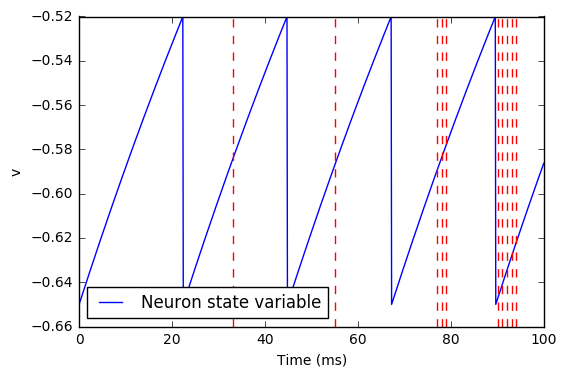

In [60]:
start_scope()

eqs = '''
dv/dt = -v / tau : 1
I : 1
tau : second
'''

F = SpikeGeneratorGroup(1, array([0] * 10), array([ 90, 91, 92, 93, 94, 33, 55, 77, 78, 79 ]) * ms)
G = NeuronGroup(1, eqs, threshold='v > -0.52', reset='v = -0.65')
G.v = -.65
S = Synapses(F, G)
S.connect(j='i')
G.tau = 100 * ms

M = StateMonitor(G, 'v', record=True)
spikemon = SpikeMonitor(F)

run(100 * ms)

plot(M.t / ms, M.v[0], '-b', label='Neuron state variable')
for t in spikemon.t:
    axvline(t/ms, ls='--', c='r', lw=1)
axhline(-0.52, ls='--', c='r', lw=1)
xlabel('Time (ms)')
ylabel('v')
legend(loc='best');